In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, kendalltau
from read_data import *

%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/scenecontext/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Main text analyses

In [2]:
allsubjdata = pd.read_csv('data/allsubjdata.csv')

In [3]:
allsubjdata

,scene,expected,initview,finalview,img_2,img_3,img_4,probe_1,probe_2,int_diff,p_exp,response,corr_resp,hit,rt,subject,date,time
0,7.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0040.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_-1.0_0090_-0...,Translate_Views_FixedLight/Scene7_-1.0_0090_-0...,-0.500,0.75,f,j,0.0,361.3,912,20220511,1652269698441
1,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,-0.550,0.75,f,f,1.0,381.1,912,20220511,1652269698441
2,10.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene10_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0035.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0050.png,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,Translate_Views_FixedLight/Scene10_-1.0_0090_0...,0.550,0.75,j,j,1.0,330.1,912,20220511,1652269698441
3,3.0,1.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene3_2.0_0015.png,Zoom_Sequences_FixedLight/Scene3_2.0_0055.png,Zoom_Sequences_FixedLight/Scene3_2.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.5...,0.500,0.75,f,j,0.0,332.1,912,20220511,1652269698441
4,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,0.550,0.75,f,j,0.0,603.4,912,20220511,1652269698441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53179,1.0,0.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_2.0_0030_0.0...,Translate_Views_FixedLight/Scene1_2.0_0030_1.0...,0.950,0.25,NaN,j,NaN,NaN,1459,20220910,1662807993840
53180,7.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0030.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_2.0_0090_-0....,Translate_Views_FixedLight/Scene7_2.0_0090_-1....,-0.950,0.25,j,j,1.0,475.6,1459,20220910,1662807993840
53181,1.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene1_2.0_0015.png,Zoom_Sequences_FixedLight/Scene1_2.0_0020.png,Zoom_Sequences_FixedLight/Scene1_2.0_0040.png,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,0.925,0.25,f,f,1.0,398.3,1459,20220910,1662807993840
53182,3.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene3_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0045.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,-0.925,0.25,f,f,1.0,344.6,1459,20220910,1662807993840


In [4]:
exclude_subjs = subject_exclusion(allsubjdata)
allsubjdata_noexcl = allsubjdata.copy()
allsubjdata = allsubjdata[~allsubjdata.subject.isin(exclude_subjs)]
print(f'Excluded {len(exclude_subjs)} out of {allsubjdata_noexcl.subject.nunique()} subjects.')
print('Final sample size:', allsubjdata.subject.nunique())

Excluded 126 out of 277 subjects.
Final sample size: 151


In [7]:
# Get mean accuracy per participant, for each experiment
allsubjdata = compute_dprimes(allsubjdata)
allsubjdata['int_diff'] = allsubjdata['int_diff'].abs()
p75data = allsubjdata[allsubjdata['p_exp']==0.75]
p50data = allsubjdata[allsubjdata['p_exp']==0.5]
p25data = allsubjdata[allsubjdata['p_exp']==0.25]
p75means = p75data.groupby(['subject', 'expected']).mean().reset_index()
p50means = p50data.groupby(['subject', 'expected']).mean().reset_index()
p25means = p25data.groupby(['subject', 'expected']).mean().reset_index()
allmeans = allsubjdata.groupby(['subject', 'expected', 'p_exp']).mean().reset_index()

In [8]:
allmeans

,subject,expected,p_exp,scene,initview,finalview,int_diff,hit,rt,date,time,dprime,criterion
0,914,0.0,0.75,5.25,0.5,60.0,0.608333,0.680851,927.812766,20220511,1652269532447,0.970219,0.616036
1,914,1.0,0.75,5.25,0.5,60.0,0.602778,0.776224,806.628671,20220511,1652269532447,1.062866,0.786578
2,917,0.0,0.75,5.25,0.5,60.0,0.298958,0.687500,661.875000,20220511,1652272664335,0.793353,0.932853
3,917,1.0,0.75,5.25,0.5,60.0,0.331424,0.743056,689.201389,20220511,1652272664335,0.817217,0.913275
4,926,0.0,0.75,5.25,0.5,60.0,0.497396,0.583333,470.512500,20220511,1652279389985,0.556156,0.936598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1457,1.0,0.25,5.25,0.5,60.0,0.563542,0.625000,483.004167,20220909,1662735197563,0.282024,0.799532
298,1458,0.0,0.25,5.25,0.5,60.0,0.901910,0.673611,603.143750,20220910,1662802413631,0.539402,0.716289
299,1458,1.0,0.25,5.25,0.5,60.0,0.905729,0.750000,578.777083,20220910,1662802413631,1.099127,0.915670
300,1459,0.0,0.25,5.25,0.5,60.0,0.974479,0.633803,634.678169,20220910,1662807993840,0.378328,1.084459


<AxesSubplot:xlabel='p_exp', ylabel='int_diff'>

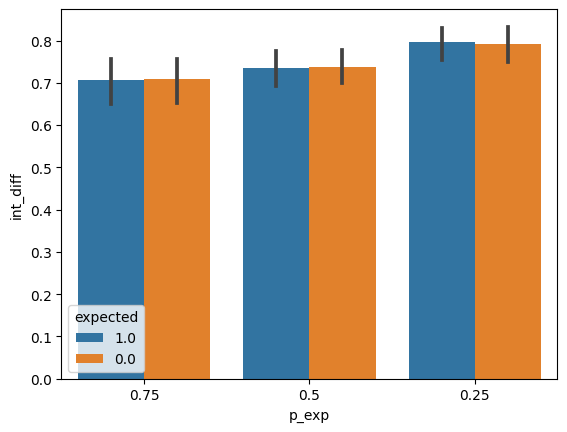

In [13]:
sns.barplot(data=allmeans, x='p_exp', order=[0.75, 0.5, 0.25], y='int_diff',
            hue='expected', hue_order=[1.0, 0.0])

In [15]:
pg.mixed_anova(data=allmeans[allmeans['p_exp'].isin([0.75, 0.25])], subject='subject', between='p_exp',
               within='expected', dv='int_diff')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,p_exp,0.378078,1,99,0.378078,6.420807,0.012847,0.060906,NaN
1,expected,0.000240,1,99,0.000240,1.151194,0.285908,0.011495,1.0
2,Interaction,0.000738,1,99,0.000738,3.548832,0.062522,0.034606,NaN


### Experiment 1

In [5]:
# Mean accuracy for congruent and incongruent trials
p75means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.650657  0.010799  0.447451  0.049735  0.702549  0.028952
1.0       0.687042  0.008407  0.697833  0.038062  0.856549  0.023740

In [58]:
pg.ttest(p75means[p75means['expected']==1].hit, 
         p75means[p75means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.169645,49,two-sided,0.00263,"[0.01, 0.06]",0.531722,12.046,0.957756


In [7]:
pg.ttest(p75means[p75means['expected']==1].dprime, 
         p75means[p75means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.480797,49,two-sided,0.000045,"[0.14, 0.36]",0.799583,480.248,0.999828


In [8]:
pg.ttest(p75means[p75means['expected']==1].criterion, 
         p75means[p75means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.961935,49,two-sided,0.000009,"[0.09, 0.22]",0.822646,2152.669,0.999908


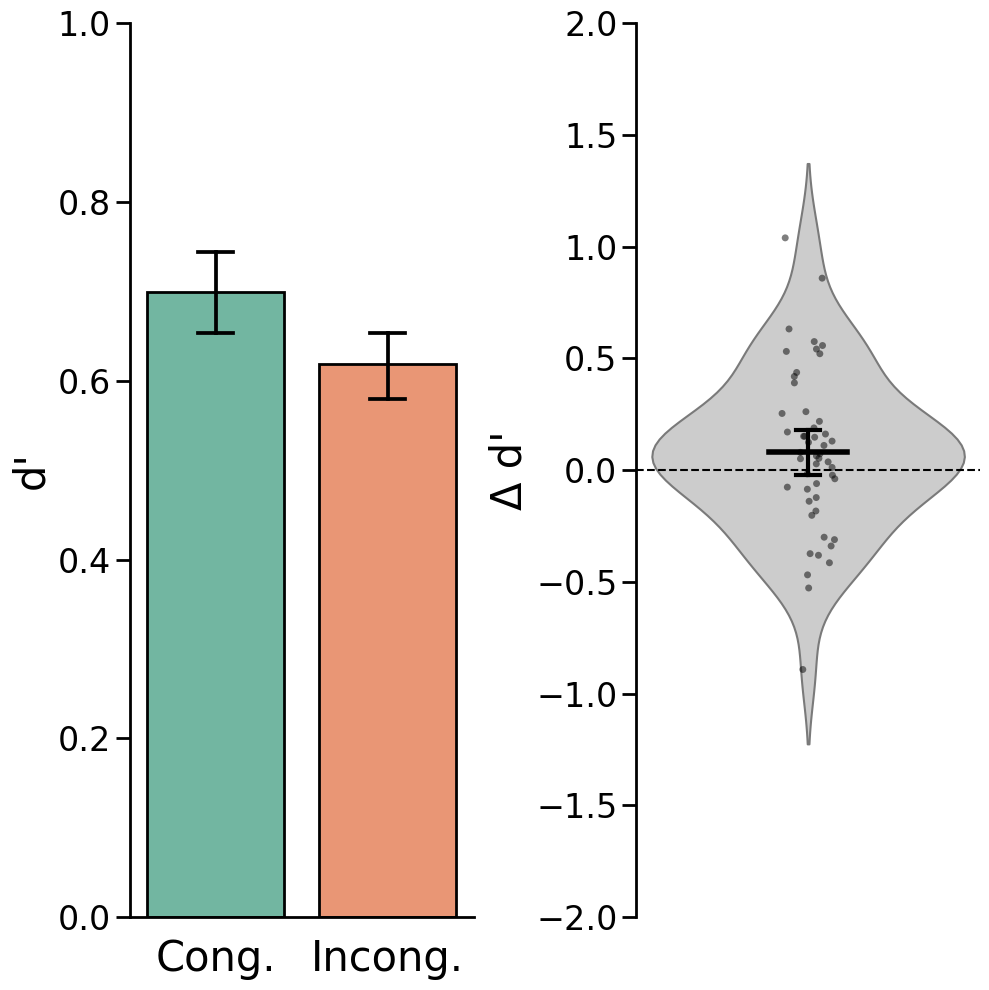

In [9]:
# Plot accuracy for congruent and incongruent trials
make_pretty_plot(p50means, measure='dprime', cloudplot=True, saveimg=False)

### Experiment 2

In [59]:
# Mean accuracy for congruent and incongruent trials
p50means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.677483  0.009019  0.619158  0.036126  0.757705  0.024752
1.0       0.686819  0.009356  0.699238  0.046311  0.865912  0.028997

In [11]:
pg.ttest(p50means[p50means['expected']==1].hit, 
         p50means[p50means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.894662,49,two-sided,0.375341,"[-0.01, 0.03]",0.14369,0.225,0.169144


In [12]:
pg.ttest(p50means[p50means['expected']==1].dprime, 
         p50means[p50means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.556432,49,two-sided,0.126041,"[-0.02, 0.18]",0.272684,0.474,0.4723


In [13]:
pg.ttest(p50means[p50means['expected']==1].criterion, 
         p50means[p50means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.276827,49,two-sided,0.001933,"[0.04, 0.17]",0.567646,15.823,0.975813


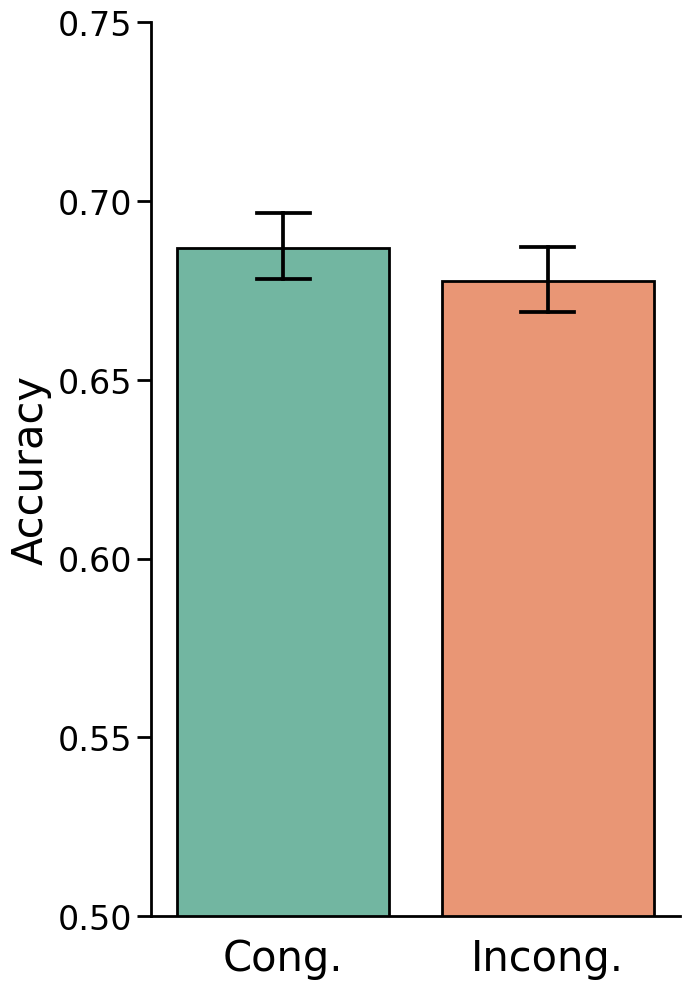

In [14]:
make_pretty_plot(p50means, measure='hit', cloudplot=False, saveimg=True)

### Experiment 3

In [60]:
# Mean accuracy for congruent and incongruent trials
p25means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.684843  0.007955  0.678650  0.038850  0.760004  0.023060
1.0       0.697440  0.012094  0.732705  0.058817  0.878562  0.029917

In [16]:
pg.ttest(p25means[p25means['expected']==1].hit, 
         p25means[p25means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.156226,50,two-sided,0.253084,"[-0.01, 0.03]",0.172326,0.286,0.226533


In [17]:
pg.ttest(p25means[p25means['expected']==1].dprime, 
         p25means[p25means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.896173,50,two-sided,0.374455,"[-0.07, 0.18]",0.151859,0.223,0.186316


In [18]:
pg.ttest(p25means[p25means['expected']==1].criterion, 
         p25means[p25means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.842851,50,two-sided,0.000344,"[0.06, 0.18]",0.621563,73.986,0.991625


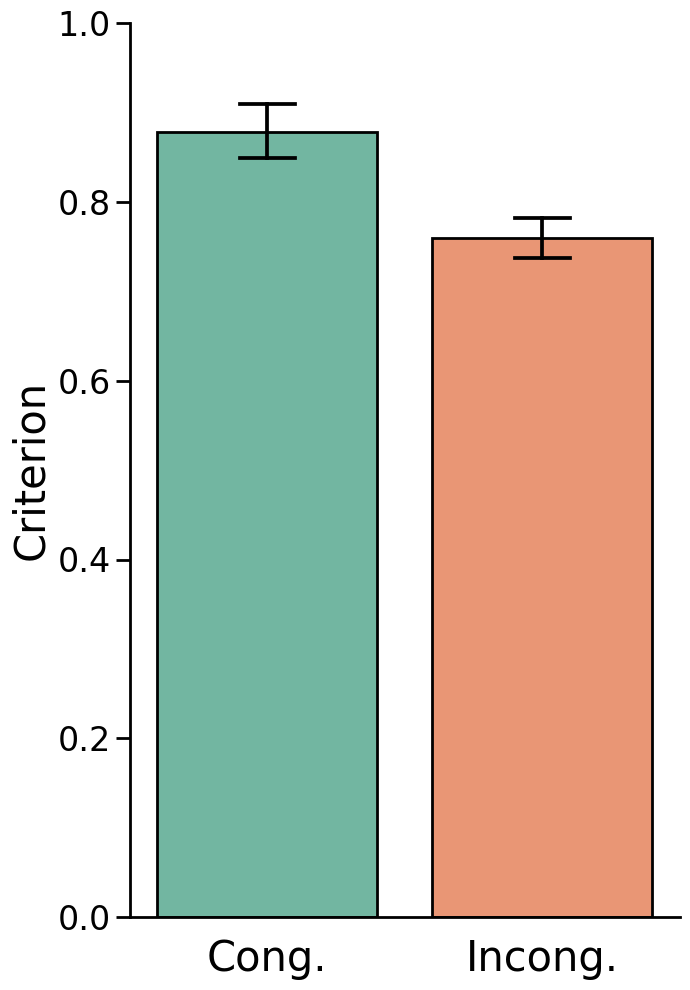

In [19]:
# Plot accuracy for congruent and incongruent trials
make_pretty_plot(p25means, measure='criterion', cloudplot=False, saveimg=True)

### Probability-congruency interaction (across experiments)

In [64]:
allmeans.subject.nunique()

151

In [61]:
aov = pg.mixed_anova(dv='hit', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
p_exp        0.025      2    148  0.013  1.954    0.145  0.026  nan
expected     0.028      1    148  0.028  9.420    0.003  0.060    1.000
Interaction  0.011      2    148  0.005  1.812    0.167  0.024  nan



In [62]:
aov = pg.mixed_anova(dv='dprime', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
p_exp        0.919      2    148  0.459   3.574    0.030  0.046  nan
expected     1.231      1    148  1.231  15.561    0.000  0.095    1.000
Interaction  0.571      2    148  0.286   3.611    0.029  0.047  nan



In [65]:
aov = pg.mixed_anova(dv='criterion', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
p_exp        0.090      2    148  0.045   0.961    0.385  0.013  nan
expected     1.215      1    148  1.215  48.225    0.000  0.246    1.000
Interaction  0.029      2    148  0.014   0.573    0.565  0.008  nan



In [23]:
allhitdiffs = []
allpexp = []
for pe in allmeans.p_exp.unique():
    thesediffs = list(allmeans[(allmeans['p_exp']==pe)&(allmeans['expected']==1)].hit.values - \
        allmeans[(allmeans['p_exp']==pe)&(allmeans['expected']==0)].hit.values)
    allhitdiffs.extend(thesediffs)
    allpexp.extend([pe] * len(thesediffs))
allhitdiffs = pd.DataFrame(list(zip(allpexp, allhitdiffs)), columns =['p_exp', 'diff'])

In [24]:
# Pairwise tests
pairwisepvals = []
for pair in [[0.75, 0.5], [0.75, 0.25], [0.5, 0.25]]:
    tstats = pg.ttest(allhitdiffs[allhitdiffs['p_exp']==pair[0]]['diff'], allhitdiffs[allhitdiffs['p_exp']==pair[1]]['diff'])
    print(f"{pair[0]} vs. {pair[1]}")
    print('===================')
    pg.print_table(tstats)
    pairwisepvals.append(tstats['p-val'])
    print('-------------------')

0.75 vs. 0.5
    T    dof  tail         p-val  CI95%            cohen-d    BF10    power
-----  -----  ---------  -------  -------------  ---------  ------  -------
1.744     98  two-sided    0.084  [-0.    0.06]      0.349   0.806    0.408

-------------------
0.75 vs. 0.25
    T     dof  tail         p-val  CI95%            cohen-d    BF10    power
-----  ------  ---------  -------  -------------  ---------  ------  -------
1.503  98.617  two-sided    0.136  [-0.01  0.06]      0.299   0.571    0.319

-------------------
0.5 vs. 0.25
     T     dof  tail         p-val  CI95%            cohen-d    BF10    power
------  ------  ---------  -------  -------------  ---------  ------  -------
-0.216  98.893  two-sided    0.829  [-0.03  0.03]      0.043   0.214    0.055

-------------------


In [25]:
# Correct for multiple comparisons
pg.multicomp(pairwisepvals, method='bonf')

(array([False, False, False]), array([0.253138  , 0.40802657, 1.        ]))

### Criterion-d' correlation

/opt/anaconda3/envs/scenecontext/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


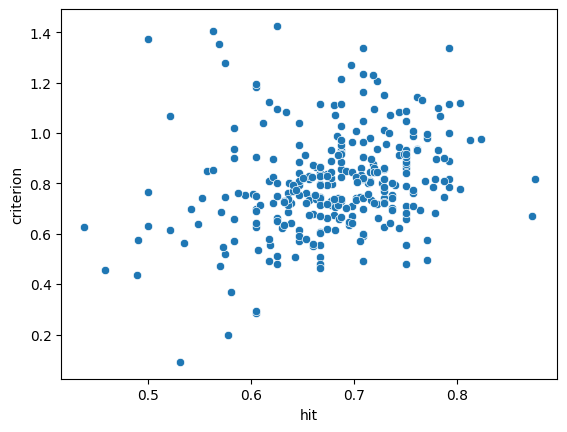

In [26]:
sns.scatterplot(allmeans['hit'], allmeans['criterion'])
plt.show()

In [27]:
pearsonr(p75means['hit'], p75means['criterion'])

(0.3633875737744417, 0.00020234940047549876)

In [28]:
pearsonr(p75means['hit'], p75means['criterion'])

(0.3633875737744417, 0.00020234940047549876)

In [29]:
allmeans

,subject,expected,p_exp,scene,initview,finalview,int_diff,hit,rt,date,time,dprime,criterion
0,914,0.0,0.75,5.25,0.5,60.0,0.096875,0.680851,927.812766,20220511,1652269532447,0.970219,0.616036
1,914,1.0,0.75,5.25,0.5,60.0,0.171528,0.776224,806.628671,20220511,1652269532447,1.062866,0.786578
2,917,0.0,0.75,5.25,0.5,60.0,0.014583,0.687500,661.875000,20220511,1652272664335,0.793353,0.932853
3,917,1.0,0.75,5.25,0.5,60.0,0.029340,0.743056,689.201389,20220511,1652272664335,0.817217,0.913275
4,926,0.0,0.75,5.25,0.5,60.0,-0.020313,0.583333,470.512500,20220511,1652279389985,0.556156,0.936598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1457,1.0,0.25,5.25,0.5,60.0,0.002083,0.625000,483.004167,20220909,1662735197563,0.282024,0.799532
298,1458,0.0,0.25,5.25,0.5,60.0,0.044271,0.673611,603.143750,20220910,1662802413631,0.539402,0.716289
299,1458,1.0,0.25,5.25,0.5,60.0,0.145312,0.750000,578.777083,20220910,1662802413631,1.099127,0.915670
300,1459,0.0,0.25,5.25,0.5,60.0,0.053646,0.633803,634.678169,20220910,1662807993840,0.378328,1.084459


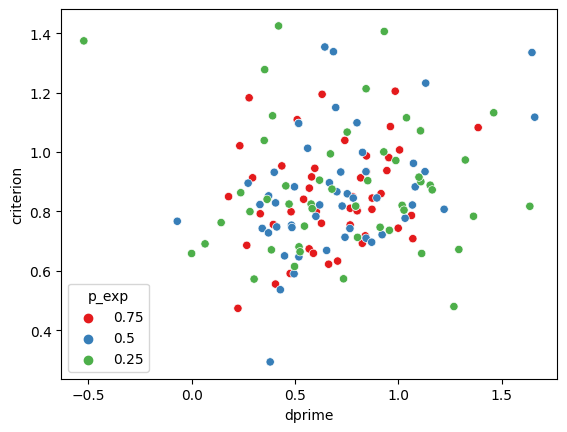

In [30]:
sns.scatterplot(x='dprime', y='criterion', hue='p_exp', 
                hue_order=[0.75, 0.5, 0.25], data=allmeans[allmeans['expected']==1], palette='Set1')
plt.show()

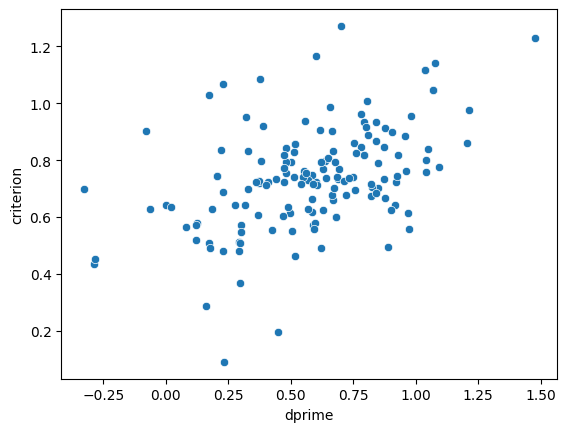

In [31]:
sns.scatterplot(x='dprime', y='criterion', data=allmeans[allmeans['expected']==0], palette='Set1')
plt.show()

In [32]:
pearsonr(allmeans[allmeans['expected']==1]['dprime'], allmeans[allmeans['expected']==1]['criterion'])

(0.16024637009883655, 0.04935663376046755)

In [33]:
pearsonr(allmeans[allmeans['expected']==0]['dprime'], allmeans[allmeans['expected']==0]['criterion'])

(0.4598762849535671, 2.8453250829335023e-09)

In [34]:
pearsonr(allmeans[allmeans['expected']==1]['hit'], allmeans[allmeans['expected']==1]['criterion'])

(0.05494889229232609, 0.5027820415727831)

In [35]:
pearsonr(allmeans[allmeans['expected']==0]['hit'], allmeans[allmeans['expected']==0]['criterion'])

(0.4026971837904237, 2.959175693880529e-07)

/opt/anaconda3/envs/scenecontext/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


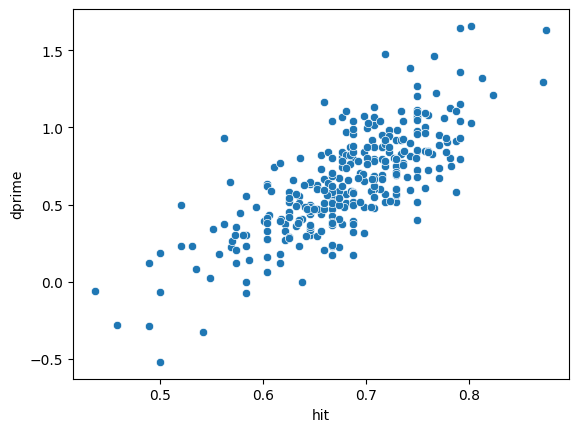

In [36]:
sns.scatterplot(allmeans['hit'], allmeans['dprime'])
plt.show()

In [37]:
pearsonr(allmeans['hit'], allmeans['dprime'])

(0.7683651359126796, 4.2937663161222405e-60)

## Supplemental analyses

### Results without exclusions

In [16]:
allsubjdata_noexcl = compute_dprimes(allsubjdata_noexcl)
p75means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.75].groupby(
    ['subject', 'expected']).mean().reset_index()
p50means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.5].groupby(
    ['subject', 'expected']).mean().reset_index()
p25means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.25].groupby(
    ['subject', 'expected']).mean().reset_index()
allmeans_noexcl = allsubjdata_noexcl.groupby([
    'subject', 'expected', 'p_exp']).mean().reset_index()

Experiment 1

In [17]:
p75means_noexcl.groupby(['expected'])[['hit']].agg(['mean', 'sem'])

hit          
              mean       sem
expected                    
0.0       0.575588  0.010948
1.0       0.602094  0.010304

In [18]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].hit, 
         p75means_noexcl[p75means_noexcl['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.326241,96,two-sided,0.001248,"[0.01, 0.04]",0.253164,18.398,0.694418


In [19]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].dprime, 
         p75means_noexcl[p75means_noexcl['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.366564,96,two-sided,0.000032,"[0.1, 0.25]",0.430258,538.25,0.987286


In [20]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].criterion, 
         p75means_noexcl[p75means_noexcl['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,6.308301,96,two-sided,8.644484e-09,"[0.11, 0.21]",0.741628,1.279e+06,1.0


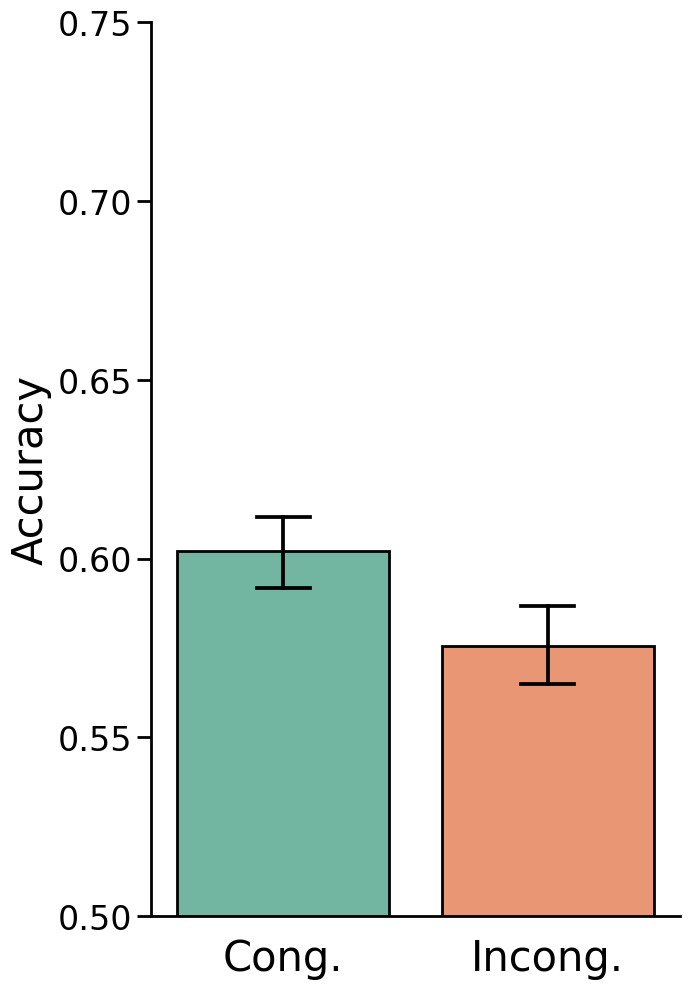

In [26]:
make_pretty_plot(p75means_noexcl, measure='hit', excl=False, saveimg=True)

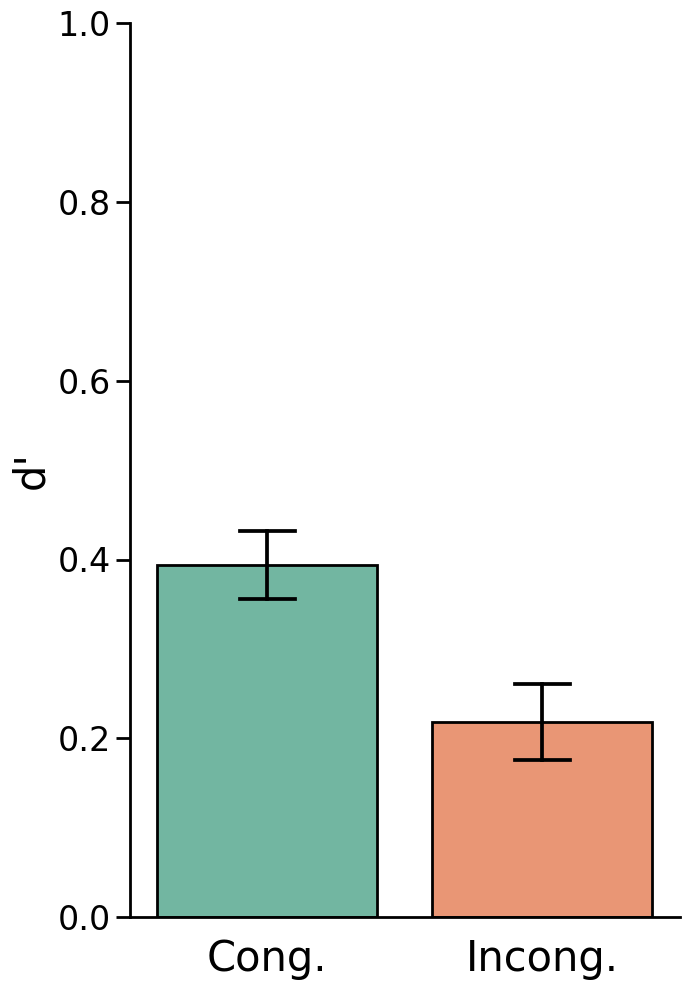

In [25]:
make_pretty_plot(p75means_noexcl, measure='dprime', excl=False, saveimg=True)

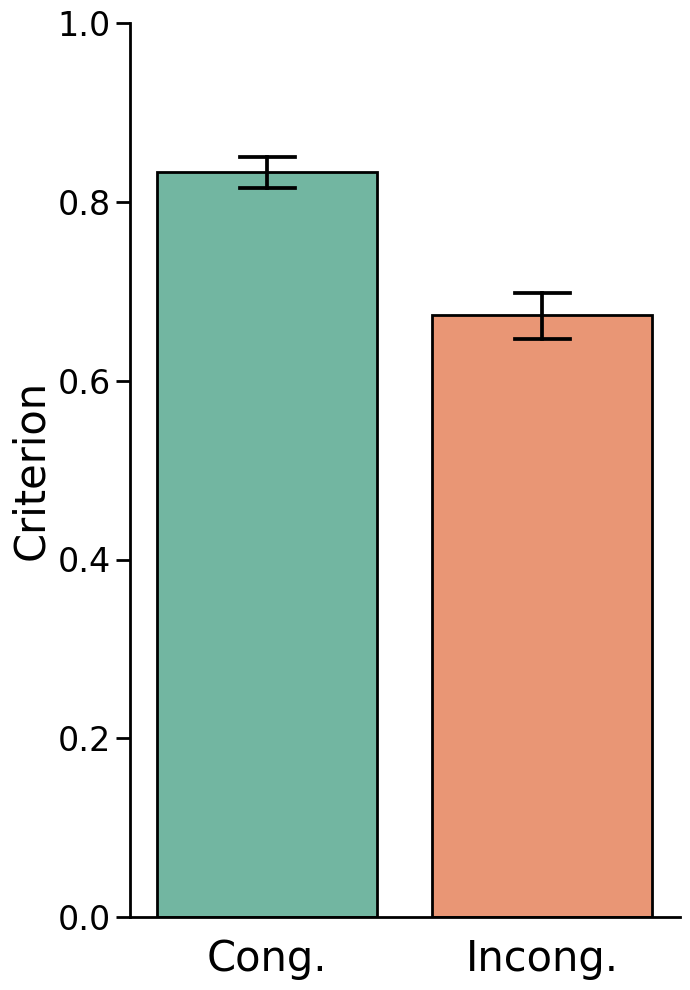

In [27]:
make_pretty_plot(p75means_noexcl, measure='criterion', excl=False, saveimg=True)

## Experiment 2

In [50]:
p50means_noexcl.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.606319  0.010897  0.379606  0.039736  0.687036  0.020349
1.0       0.611007  0.011315  0.419313  0.046829  0.812450  0.025061

In [51]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].hit, 
         p50means_noexcl[p50means_noexcl['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.620478,86,two-sided,0.536584,"[-0.01, 0.02]",0.045254,0.143,0.070188


In [53]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].dprime, 
         p50means_noexcl[p50means_noexcl['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.062326,86,two-sided,0.291062,"[-0.03, 0.11]",0.098027,0.204,0.147618


In [52]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].criterion, 
         p50means_noexcl[p50means_noexcl['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.787167,86,two-sided,0.000007,"[0.07, 0.18]",0.589029,2308.991,0.999742


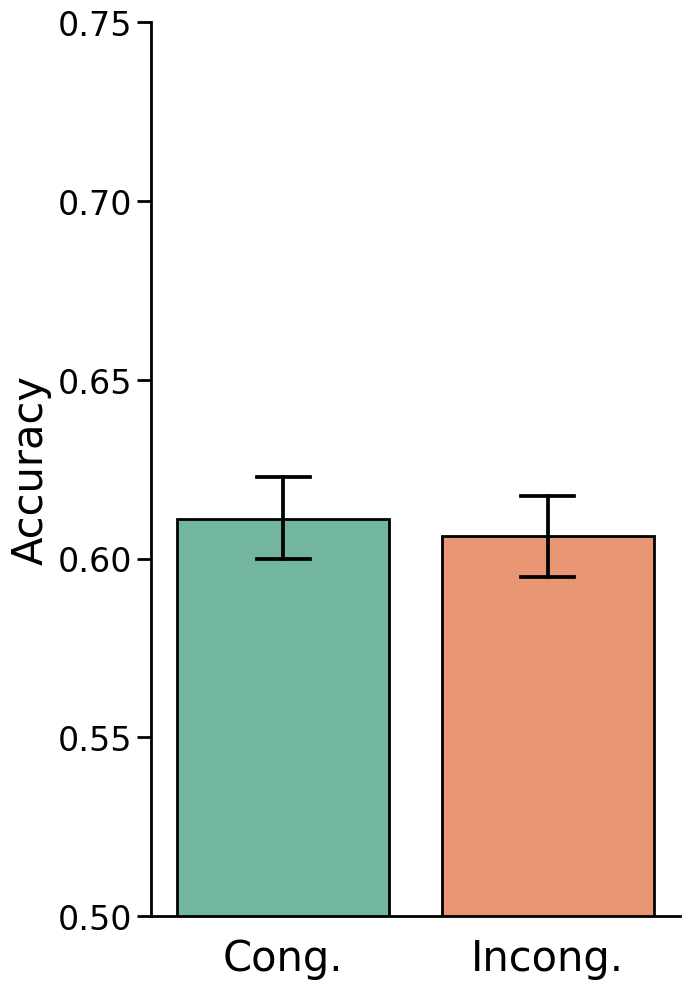

In [28]:
make_pretty_plot(p50means_noexcl, measure='hit', excl=False, saveimg=True)

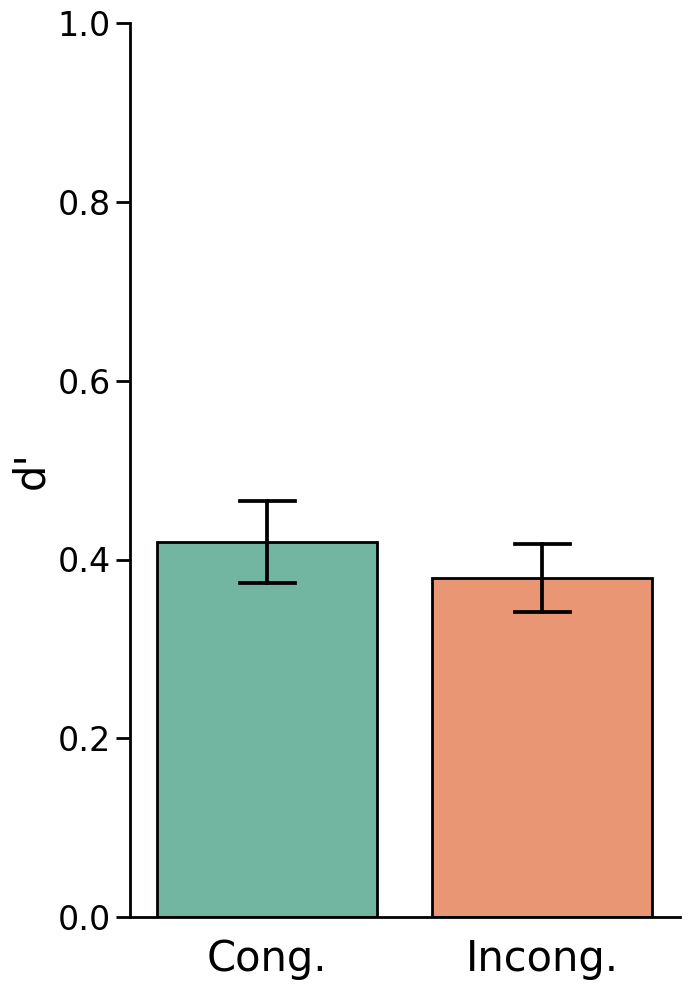

In [29]:
make_pretty_plot(p50means_noexcl, measure='dprime', excl=False, saveimg=True)

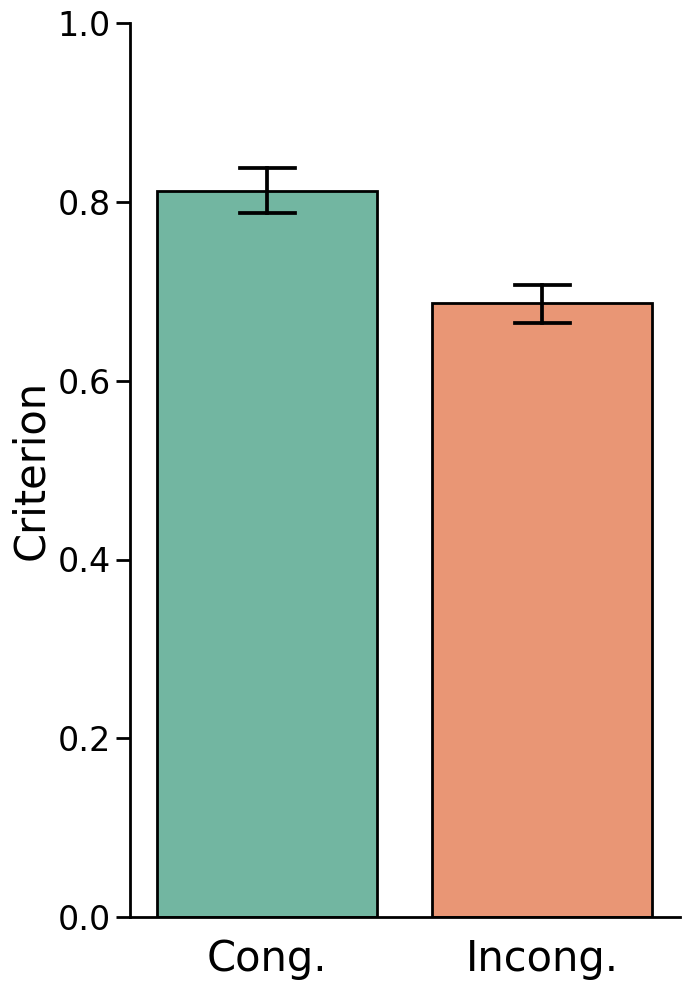

In [30]:
make_pretty_plot(p50means_noexcl, measure='criterion', excl=False, saveimg=True)

## Experiment 3

In [54]:
p25means_noexcl.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.602704  0.010765  0.388766  0.041310  0.714396  0.018026
1.0       0.599965  0.013794  0.385226  0.054785  0.832245  0.027108

In [55]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].hit, 
         p25means_noexcl[p25means_noexcl['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.33263,92,two-sided,0.74017,"[-0.02, 0.01]",0.022955,0.121,0.055515


In [56]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].dprime, 
         p25means_noexcl[p25means_noexcl['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.083455,92,two-sided,0.933671,"[-0.09, 0.08]",0.007565,0.115,0.050597


In [57]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].criterion, 
         p25means_noexcl[p25means_noexcl['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.079385,92,two-sided,0.000096,"[0.06, 0.18]",0.53088,196.097,0.99905


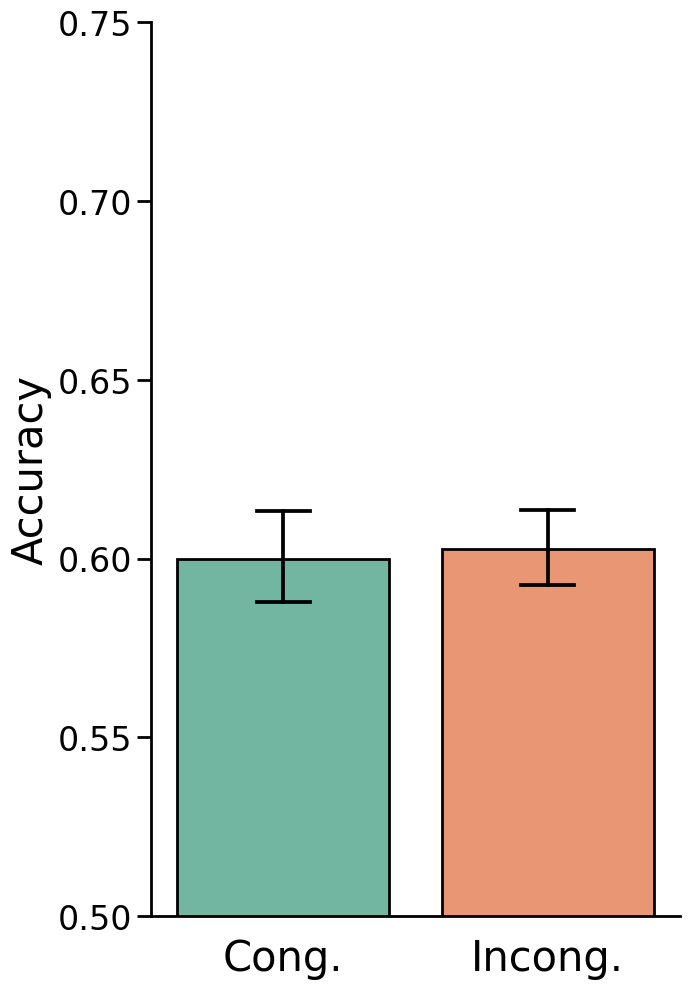

In [31]:
make_pretty_plot(p25means_noexcl, measure='hit', excl=False, saveimg=True)

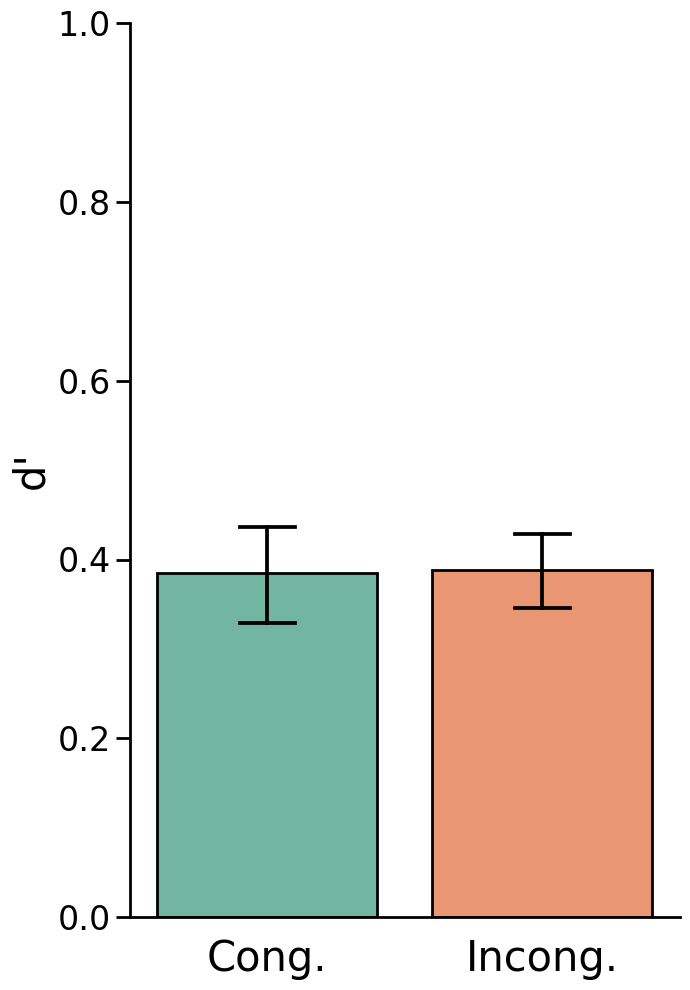

In [32]:
make_pretty_plot(p25means_noexcl, measure='dprime', excl=False, saveimg=True)

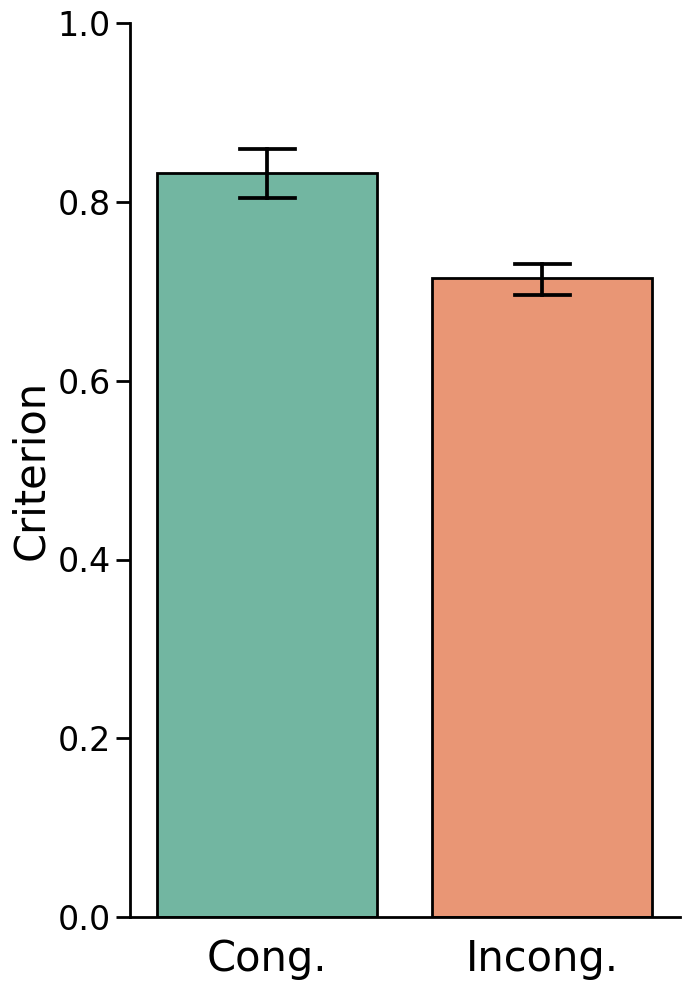

In [33]:
make_pretty_plot(p25means_noexcl, measure='criterion', excl=False, saveimg=True)

### Sensitivity and bias

Experiment 1

In [59]:
# Mean accuracy for congruent and incongruent trials
p75means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

dprime           criterion          
              mean       sem      mean       sem
expected                                        
0.0       0.484739  0.049828  0.565118  0.033726
1.0       0.747401  0.031528  0.821292  0.017333

In [34]:
pg.ttest(p75means[p75means['expected']==1].hit, 
         p75means[p75means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.169645,49,two-sided,0.00263,"[0.01, 0.06]",0.531722,12.046,0.957756


In [60]:
pg.ttest(p75means[p75means['expected']==1].dprime, 
         p75means[p75means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.528704,49,two-sided,0.000038,"[0.15, 0.38]",0.890907,556.077,1.0


In [61]:
pg.ttest(p75means[p75means['expected']==1].criterion, 
         p75means[p75means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,6.6326,49,two-sided,2.460869e-08,"[0.18, 0.33]",1.351145,5.36e+05,1.0


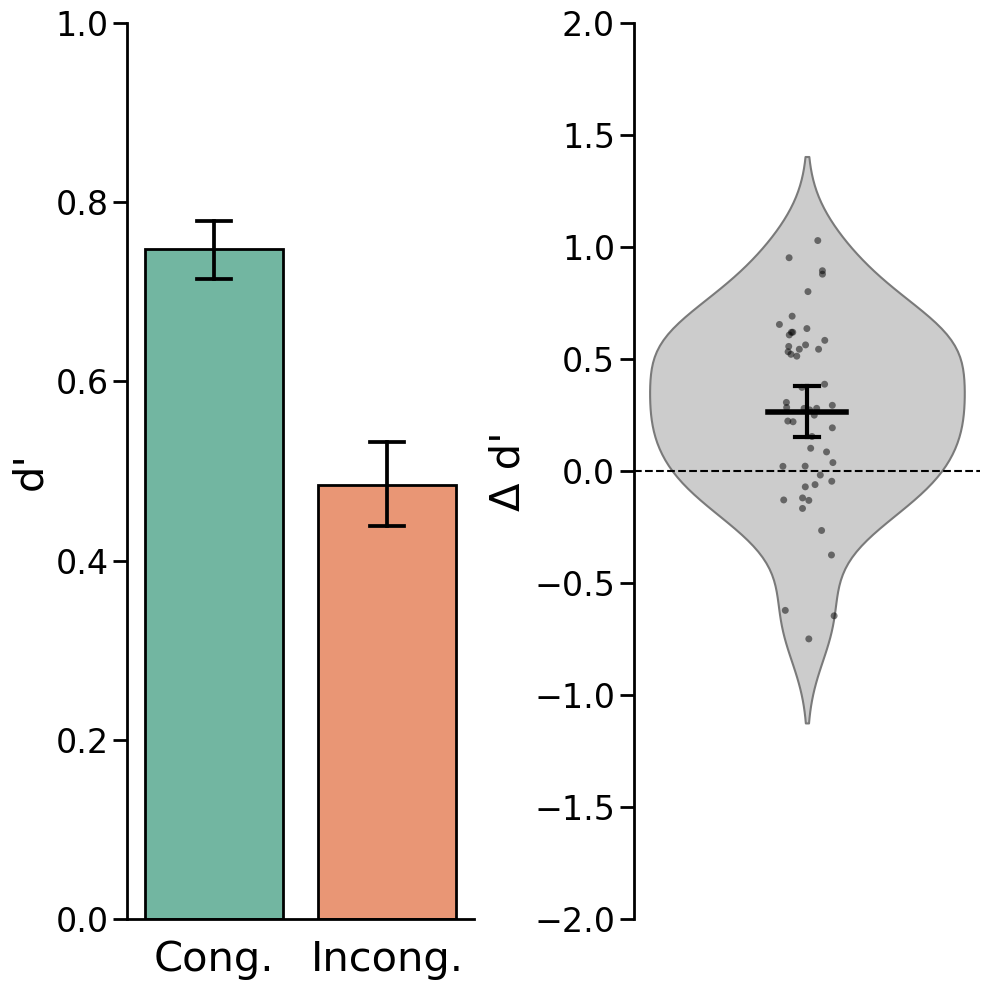

In [62]:
make_pretty_plot(p75means, measure='dprime')

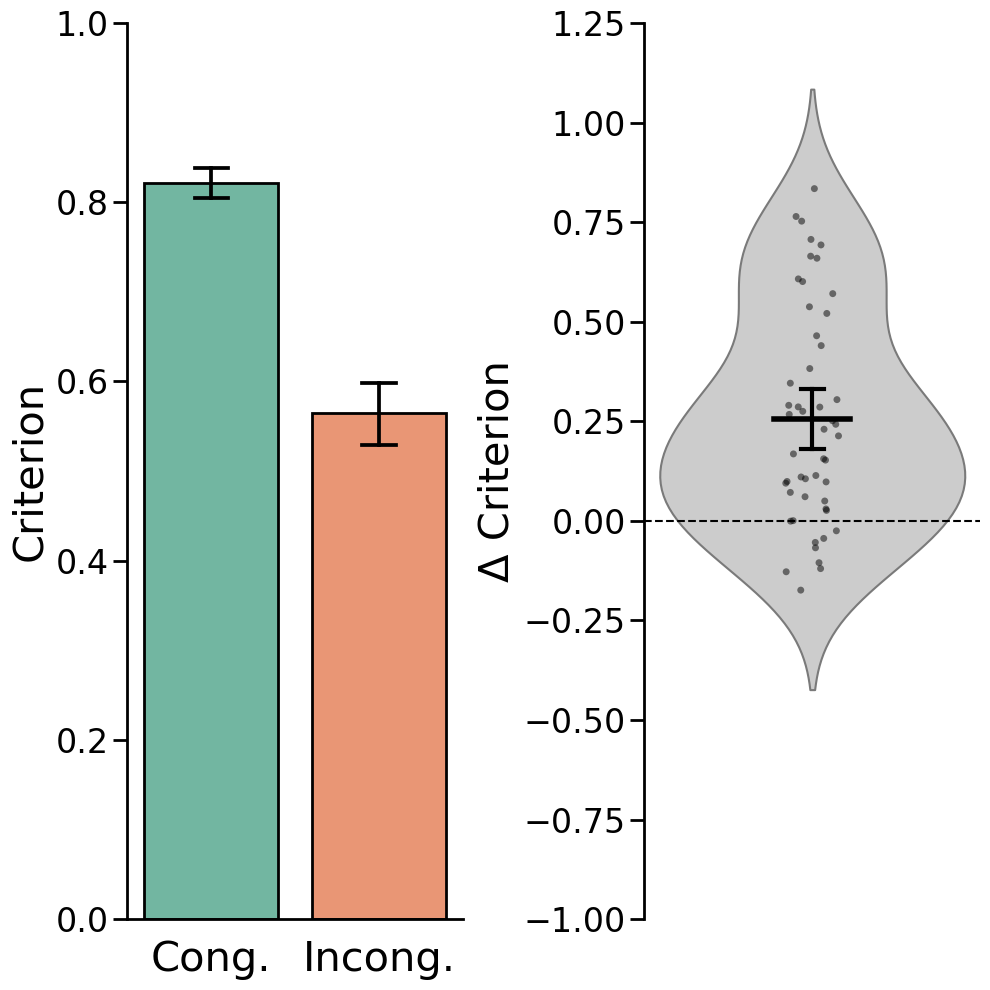

In [63]:
make_pretty_plot(p75means, measure='criterion')

Experiment 2

In [64]:
# Mean accuracy for congruent and incongruent trials
p50means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

dprime           criterion          
              mean       sem      mean       sem
expected                                        
0.0       0.594017  0.036687  0.707926  0.023401
1.0       0.750409  0.045331  0.816146  0.024761

In [65]:
pg.ttest(p50means[p50means['expected']==1].dprime, 
         p50means[p50means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.528704,49,two-sided,0.000038,"[0.15, 0.38]",0.890907,556.077,1.0


In [66]:
pg.ttest(p50means[p50means['expected']==1].criterion, 
         p50means[p50means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,6.6326,49,two-sided,2.460869e-08,"[0.18, 0.33]",1.351145,5.36e+05,1.0


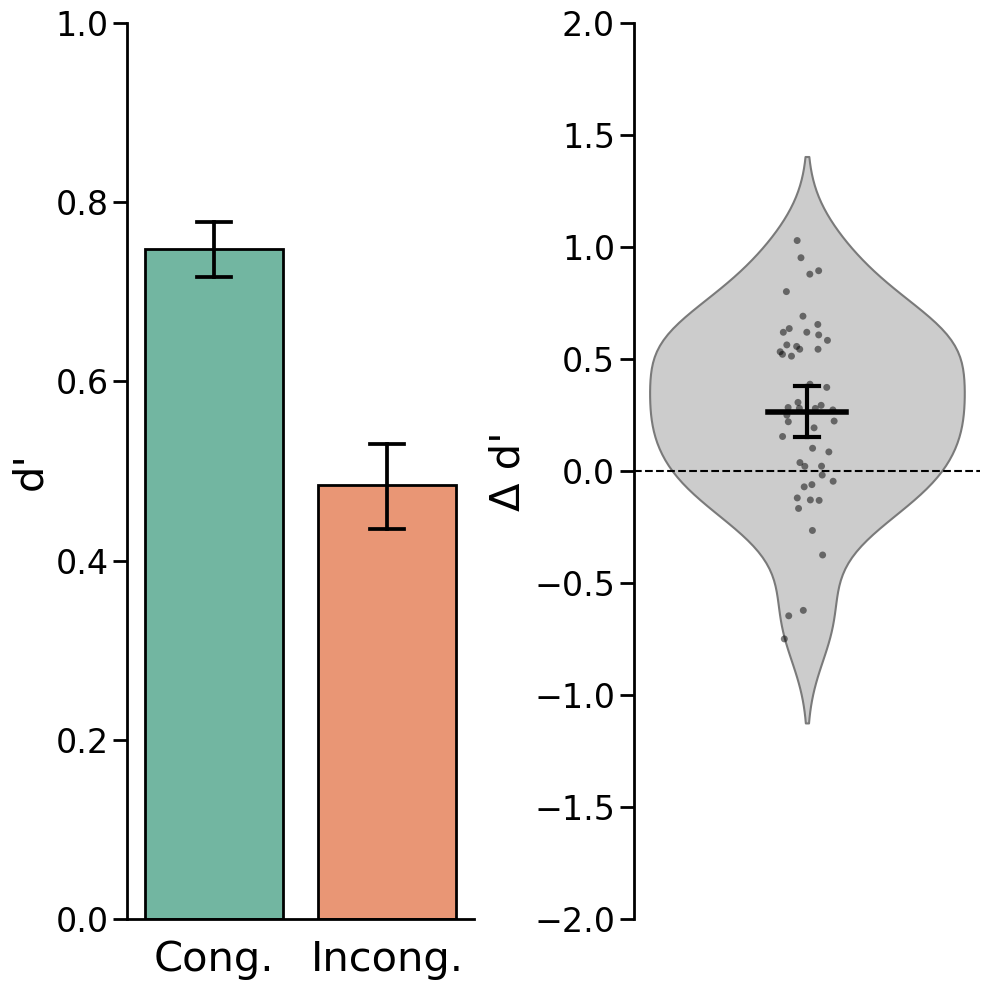

In [67]:
make_pretty_plot(p50means, measure='dprime')

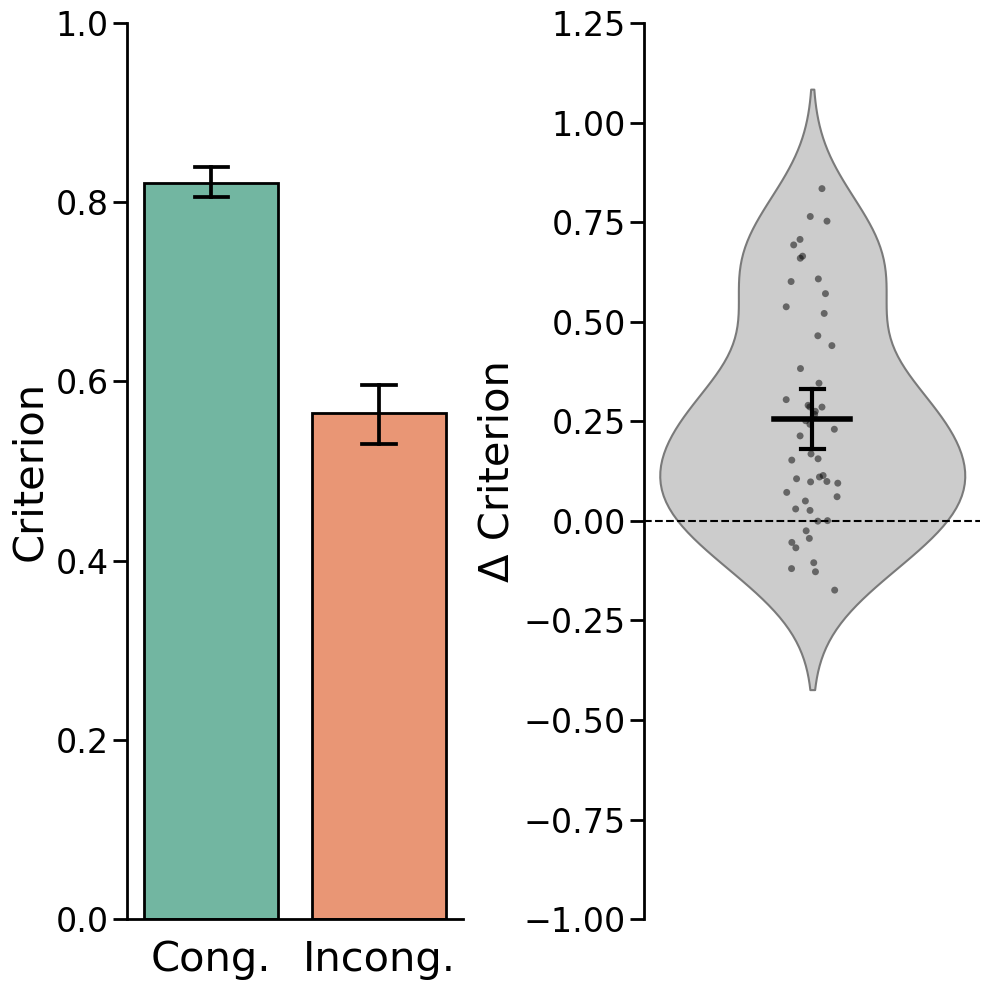

In [68]:
make_pretty_plot(p50means, measure='criterion')

Experiment 3

In [69]:
# Mean accuracy for congruent and incongruent trials
p25means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

dprime           criterion          
              mean       sem      mean       sem
expected                                        
0.0       0.593328  0.034323  0.730321  0.020292
1.0       0.779400  0.052984  0.836958  0.024460

In [70]:
pg.ttest(p25means[p25means['expected']==1].dprime, 
         p25means[p25means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.921716,51,two-sided,0.000263,"[0.09, 0.28]",0.578048,93.741,0.983361


In [71]:
pg.ttest(p25means[p25means['expected']==1].criterion, 
         p25means[p25means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.595209,51,two-sided,0.00073,"[0.05, 0.17]",0.658038,37.281,0.996472


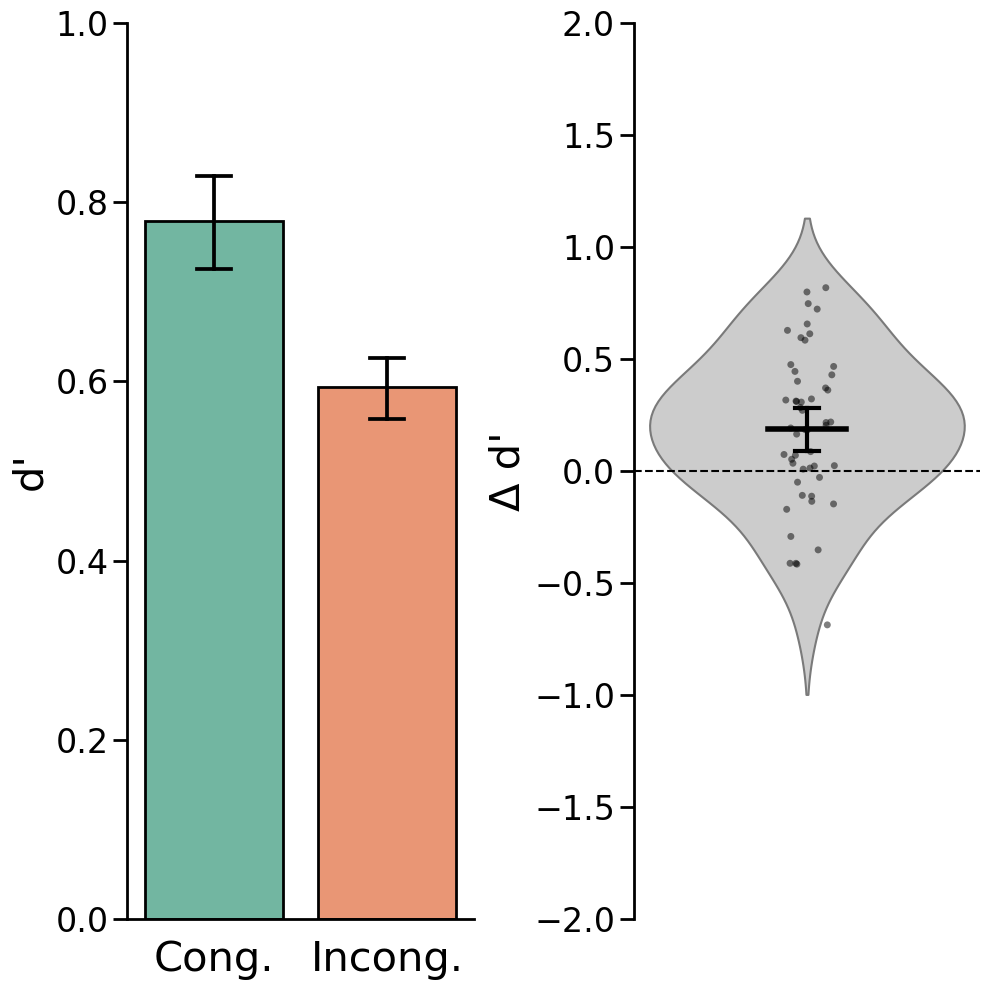

In [72]:
make_pretty_plot(p25means, measure='dprime')

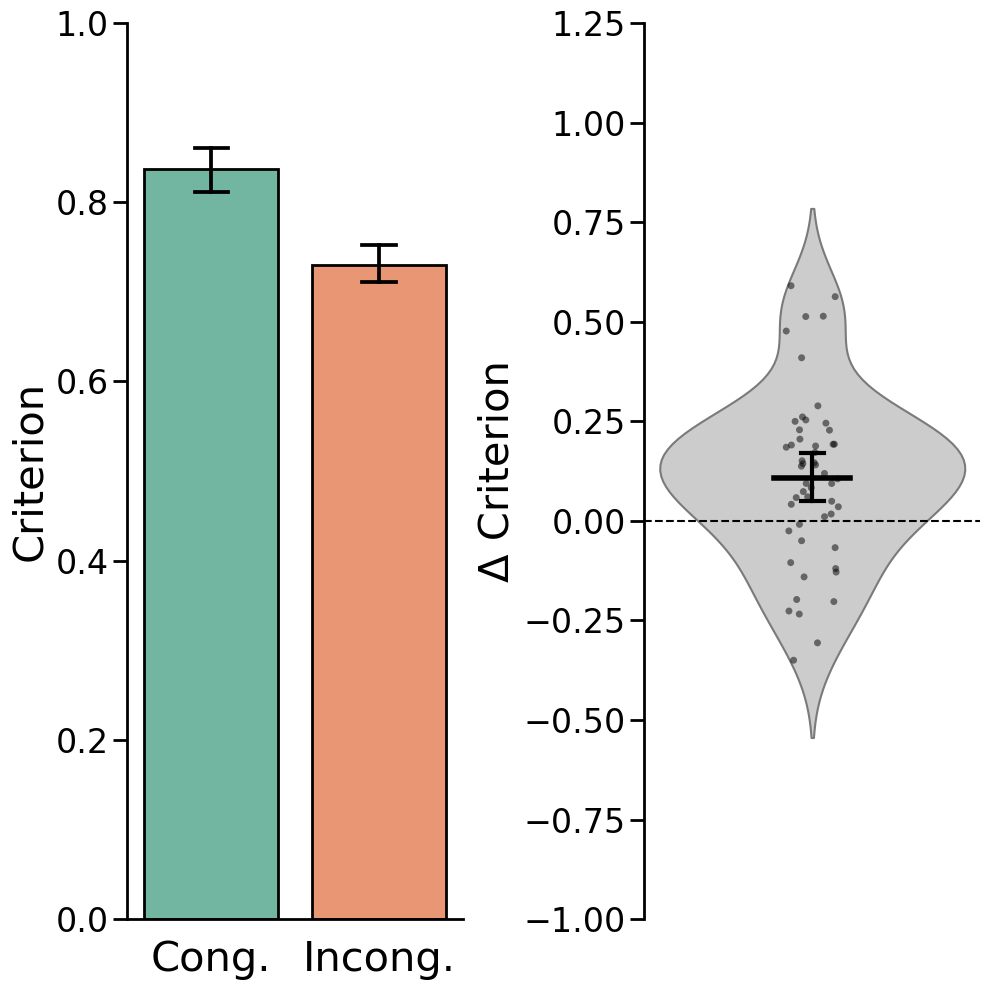

In [73]:
make_pretty_plot(p25means, measure='criterion')

### Final survey

In [36]:
allsurveys = get_surveys(allsubjdata)

In [37]:
allsurveys.subject.nunique()

151

In [38]:
allsurveys.groupby(['p_exp'])[['sequence_attention', 
                               'object_expect',
                               'percent_expected']].agg(['mean', 'sem'])

sequence_attention           object_expect           percent_expected  \
                    mean       sem          mean       sem             mean   
p_exp                                                                         
0.25            4.019608  0.230073      3.313725  0.238443        55.843137   
0.50            4.300000  0.208493      3.760000  0.216767        54.500000   
0.75            4.420000  0.189715      3.530612  0.244153        56.960000   

                 
            sem  
p_exp            
0.25   2.936367  
0.50   2.393571  
0.75   2.446982

In [103]:
aov = pg.welch_anova(dv='sequence_attention', between='p_exp', data=allsurveys)

pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc    np2
--------  -------  -------  -----  -------  -----
p_exp           2   99.246  1.169    0.315  0.014



In [104]:
aov = pg.welch_anova(dv='object_expect', between='p_exp', data=allsurveys)

pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc    np2
--------  -------  -------  -----  -------  -----
p_exp           2   98.694  0.151    0.860  0.002



In [105]:
aov = pg.welch_anova(dv='percent_expected', between='p_exp', data=allsurveys)

pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2      F    p-unc    np2
--------  -------  -------  -----  -------  -----
p_exp           2   98.998  4.117    0.019  0.052



In [41]:
print('==================')
print('Overall')
print('------------------')
accdiffs = allmeans[allmeans['expected']==1].hit.values - \
           allmeans[allmeans['expected']==0].hit.values
critdiffs = allmeans[allmeans['expected']==1].criterion.values - \
            allmeans[allmeans['expected']==0].criterion.values
dprdiffs = allmeans[allmeans['expected']==1].dprime.values - \
           allmeans[allmeans['expected']==0].dprime.values
print('Accuracy-sequence attention correlation:')
stats = pg.corr(allsurveys.sequence_attention, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

print('Accuracy-object prediction correlation:')
stats = pg.corr(allsurveys.object_expect, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

print('Accuracy-probability estimate correlation:')
stats = pg.corr(allsurveys.percent_expected, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

for pe in [0.75, 0.5, 0.25]:
    print('==================')
    print('P(Exp) =', pe)
    print('------------------')
    thispexp = allmeans[allmeans['p_exp']==pe]
    critdiffs = thispexp[thispexp['expected']==1].criterion.values - \
                thispexp[thispexp['expected']==0].criterion.values
    dprdiffs = thispexp[thispexp['expected']==1].dprime.values - \
               thispexp[thispexp['expected']==0].dprime.values
    accdiffs = thispexp[thispexp['expected']==1].hit.values - \
               thispexp[thispexp['expected']==0].hit.values
    print('Accuracy-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    
    print('-------------------------------')
    print('Accuracy-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    
    print('-------------------------------')
    print('Accuracy-probability estimate correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-probability correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-probability correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

Overall
------------------
Accuracy-sequence attention correlation:
r = 0.03999653961215315 - p = 0.625835517455807 - BF01 = 8.695652173913043 

Accuracy-object prediction correlation:
r = -0.09091310134893812 - p = 0.26853958145262513 - BF01 = 5.347593582887701 

Accuracy-probability estimate correlation:
r = -0.021467466235181566 - p = 0.7936030994246064 - BF01 = 9.523809523809524 

P(Exp) = 0.75
------------------
Accuracy-sequence attention correlation:
r = 0.17373497492606538 - p = 0.22757793057253117 - BF01 = 2.793296089385475 

D prime-sequence attention correlation:
r = 0.10459561719433563 - p = 0.46975210187915756 - BF01 = 4.405286343612334 

Criterion-sequence attention correlation:
r = 0.07124960452098748 - p = 0.6229359251003218 - BF01 = 5.05050505050505 

-------------------------------
Accuracy-object prediction correlation:
r = -0.2926399671352069 - p = 0.04129987936638242 - BF01 = 0.7429420505200593 

D prime-object prediction correlation:
r = 0.045271198209672396 - p =